In [42]:
import glob
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')

In [43]:
parts = glob.glob('./results/experiment-join/*')

In [44]:
files = []
for part in parts:
    sub_parts = glob.glob(os.path.join(part, 'part-*'))
    for sub in sub_parts:
        files.append(sub)

In [45]:
files = np.array(files).flatten()

In [46]:
print(files[:5])

['./results/experiment-join/result-1633639228000/part-00001'
 './results/experiment-join/result-1633639228000/part-00000'
 './results/experiment-join/result-1633639368000/part-00001'
 './results/experiment-join/result-1633639368000/part-00000'
 './results/experiment-join/result-1633639412000/part-00001']


In [47]:
data = []
for file in files:
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            point = json.loads(line.replace("'", '"'))
            data.append(point)

In [48]:
print(data[:5])

[{'userID': 2, 'gemPackID:': 4, 'p.time': 1633638944.5395591, 'a.time': 1633638947.5388033, 'time': 1633638948.2849627, 'latency': 0.7461597919464111}, {'userID': 4, 'gemPackID:': 3, 'p.time': 1633638686.5396857, 'a.time': 1633638687.5395193, 'time': 1633638690.069983, 'latency': 2.5304641723632812}, {'userID': 3, 'gemPackID:': 4, 'p.time': 1633639204.5397162, 'a.time': 1633639205.5388517, 'time': 1633639208.3166697, 'latency': 2.777818441390991}, {'userID': 4, 'gemPackID:': 4, 'p.time': 1633639207.5388565, 'a.time': 1633639207.5386999, 'time': 1633639208.3135555, 'latency': 0.7746994495391846}, {'userID': 1, 'gemPackID:': 2, 'p.time': 1633639246.539042, 'a.time': 1633639247.5386868, 'time': 1633639248.2987273, 'latency': 0.7600409984588623}]


In [49]:
df = pd.DataFrame(data)

In [50]:
df['t'] = df['time'] - df['time'].min()

In [51]:
df = df.sort_values('t')

In [52]:
print(df.head(10))

     userID  gemPackID:        p.time        a.time          time   latency  \
129       0           0  1.633639e+09  1.633639e+09  1.633639e+09  2.984693   
1         4           3  1.633639e+09  1.633639e+09  1.633639e+09  2.530464   
53        0           1  1.633639e+09  1.633639e+09  1.633639e+09  1.155901   
54        2           0  1.633639e+09  1.633639e+09  1.633639e+09  1.156096   
55        2           4  1.633639e+09  1.633639e+09  1.633639e+09  1.155697   
56        2           4  1.633639e+09  1.633639e+09  1.633639e+09  1.156872   
18        2           2  1.633639e+09  1.633639e+09  1.633639e+09  2.859577   
16        4           1  1.633639e+09  1.633639e+09  1.633639e+09  0.927040   
17        4           1  1.633639e+09  1.633639e+09  1.633639e+09  1.927083   
105       1           3  1.633639e+09  1.633639e+09  1.633639e+09  1.845969   

             t  
129   0.000000  
1     7.546580  
53   10.172437  
54   10.172471  
55   10.172474  
56   10.172490  
18   13.876

In [53]:
print(df.tail(10))

    userID  gemPackID:        p.time        a.time          time   latency  \
13       1           3  1.633639e+09  1.633639e+09  1.633639e+09  0.724619   
14       2           3  1.633639e+09  1.633639e+09  1.633639e+09  1.724735   
15       2           3  1.633639e+09  1.633639e+09  1.633639e+09  2.724982   
12       4           3  1.633639e+09  1.633639e+09  1.633639e+09  0.727994   
93       2           4  1.633639e+09  1.633639e+09  1.633639e+09  0.738405   
94       2           4  1.633639e+09  1.633639e+09  1.633639e+09  0.737883   
95       3           2  1.633639e+09  1.633639e+09  1.633639e+09  0.737673   
92       4           1  1.633639e+09  1.633639e+09  1.633639e+09  0.740364   
76       3           2  1.633639e+09  1.633639e+09  1.633639e+09  0.737315   
77       3           2  1.633639e+09  1.633639e+09  1.633639e+09  0.737626   

             t  
13  585.740326  
14  585.740374  
15  585.740378  
12  585.743444  
93  589.753892  
94  589.753944  
95  589.753950  
92  5

In [54]:
print(df.describe())

           userID  gemPackID:        p.time        a.time          time  \
count  214.000000  214.000000  2.140000e+02  2.140000e+02  2.140000e+02   
mean     2.107477    1.990654  1.633639e+09  1.633639e+09  1.633639e+09   
std      1.374701    1.466338  1.900899e+02  1.901078e+02  1.900485e+02   
min      0.000000    0.000000  1.633639e+09  1.633639e+09  1.633639e+09   
25%      1.000000    1.000000  1.633639e+09  1.633639e+09  1.633639e+09   
50%      2.000000    2.000000  1.633639e+09  1.633639e+09  1.633639e+09   
75%      3.000000    3.000000  1.633639e+09  1.633639e+09  1.633639e+09   
max      4.000000    4.000000  1.633639e+09  1.633639e+09  1.633639e+09   

          latency           t  
count  214.000000  214.000000  
mean     1.607644  260.384994  
std      0.907922  190.048462  
min      0.724345    0.000000  
25%      0.774861   66.843093  
50%      1.745564  239.769145  
75%      1.859282  413.761043  
max      3.836547  593.753065  


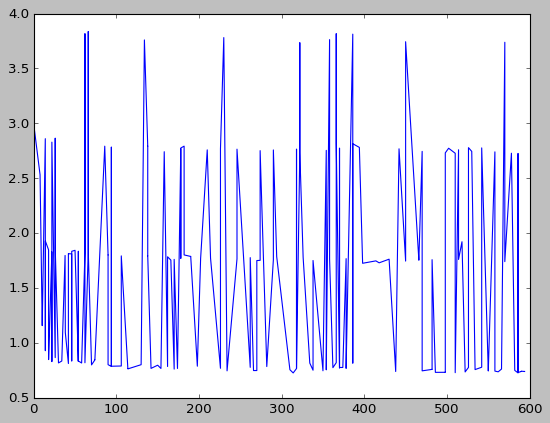

In [55]:
plt.plot(df['t'].values, df['latency'].values)

In [56]:
print(df.size)
print(df['t'][60:100])
print(df['latency'][500:10000])

1498
191     85.807522
110     89.815343
111     89.815391
112     89.815395
137     93.799203
138     93.799256
136     93.800933
6      105.803225
5      105.806664
108    113.777015
109    113.777061
23     129.815072
50     133.775899
113    137.807009
114    137.807051
115    137.807056
116    137.807101
117    137.807106
118    137.807111
119    137.807115
134    141.781493
65     149.810503
39     153.780466
153    157.755988
172    161.798631
173    161.798681
11     165.768064
102    169.774568
103    169.774613
86     173.780405
188    177.783535
189    177.783597
190    177.783603
187    177.790532
166    181.806893
165    181.815417
71     189.802028
70     189.802436
51     197.801538
52     197.801586
Name: t, dtype: float64
Series([], Name: latency, dtype: float64)
